In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import joblib

In [6]:
fileTest = pd.read_csv('C:\\Users\\לידור\\Desktop\\ML\\test.csv')
fileTrain = pd.read_csv('C:\\Users\\לידור\\Desktop\\ML\\train.csv')

In [7]:
X_train = fileTrain.drop(labels=['HeartDiseaseorAttack','NoDocbcCost','CholCheck'], axis=1)
X_test = fileTest.drop(labels=['HeartDiseaseorAttack','NoDocbcCost','CholCheck'], axis=1)
Y_train = fileTrain['HeartDiseaseorAttack']
Y_test = fileTest['HeartDiseaseorAttack']

In [8]:
model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

# Training of the algorithm
model.fit(X_train,Y_train)

# Prediction
predict_test = model.predict(X_test)


filename="fff.joblib"
joblib.dump(model,filename)
loaded_model = joblib.load('C:\\Users\\לידור\\Desktop\\WIN\\fff.joblib')
XT=[1,5,7,1,0,0,0,3,1,0,1,1,0,0,0,0,23,0,1]
#[8,4,7,1,0,0,0,3,1,0,1,0,0,0,0,1,27,1,1]-1
#[1,5,7,1,0,0,0,3,1,0,1,1,0,0,0,0,23,0,1]-0
XT = np.array(XT).reshape(1, -1)
res = loaded_model.predict(XT)
predict_test111 = model.predict(XT)


print(res)
print(predict_test111)

[0]
[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [9]:
from sklearn import metrics

#accuracy
print('Accuracy=',metrics.accuracy_score(Y_test,predict_test))

# features importance
#print(model.feature_importances_)


print('F1= ',metrics.f1_score(Y_test,predict_test));
cf_matrix = metrics.confusion_matrix(Y_test,predict_test)

pd.DataFrame(data=[accuracy_score(Y_test, predict_test), recall_score(Y_test, predict_test),
                   precision_score(Y_test, predict_test), roc_auc_score(Y_test, predict_test)],
             index=["accuracy", "recall", "precision", "roc_auc_score"])



1
Accuracy= 0.9083228214022916
F1=  0.15522460346288897


,0
accuracy,0.908323
recall,0.089600
precision,0.580090
roc_auc_score,0.541435


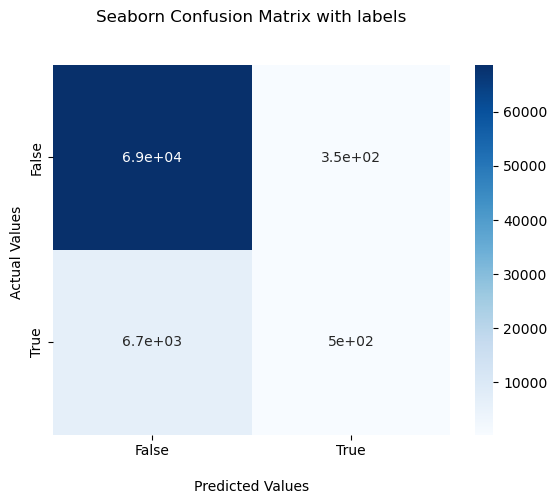

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     75255
           1       0.07      0.59      0.13       849

    accuracy                           0.91     76104
   macro avg       0.53      0.75      0.54     76104
weighted avg       0.98      0.91      0.94     76104



In [20]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


print(metrics.classification_report(predict_test,Y_test))
exit(0)